In [21]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import json
from PIL import Image
import os

In [68]:
# Download data in json format

os.makedirs("images_train", exist_ok=True)
os.makedirs("images_test", exist_ok=True)


train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

# Create JSON files for training and test datasets
def create_json(dataset, json_filename):
    data_list = []
    for i, (image, label) in enumerate(dataset):
        data_list.append({"img_path": f"{i}.png", "labels": label})
        base_name = os.path.basename(json_filename)
        type_data = base_name.split('_')[0] # returns train or test
        directory = "images_" + type_data
        image_path = os.path.join(directory, f"{i}.png")
        torchvision.utils.save_image(image, image_path)
    with open(json_filename, 'w') as json_file:
      for data in data_list:
        json.dump(data, json_file)
        json_file.write('\n')

create_json(train_data, "train_data.json")
create_json(test_data, "test_data.json")

In [70]:
# Dataset customed

class CustomImageDataset(Dataset):

    def __init__(self, json_filename, transform=None):
        """
        Arguments:
            json_filename (string): Json file with images paths and labels.
            transform (callable, optional): Optional transform to be applied.
        """
        self.data_list = []
        with open(json_filename, 'r') as file:
          for line in file:
              loaded_dict = json.loads(line)
              self.data_list.append(loaded_dict)
        self.transform = transform
        self.json_filename = json_filename

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
      img_path_aux = self.data_list[idx]['img_path']
      base_name = os.path.basename(self.json_filename)
      type_data = base_name.split('_')[0]
      directory = "images_" + type_data
      img_path = os.path.join(directory, img_path_aux)
      image = Image.open(img_path)

      #image = Image.open(img_path).convert('RGB')
      if self.transform:
            sample = self.transform(sample)

      label = self.data_list[idx]['labels']
      return image, label

train_dataset = CustomImageDataset("train_data.json")
test_dataset = CustomImageDataset("test_data.json")

9


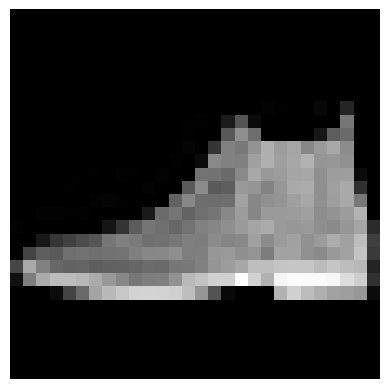

9


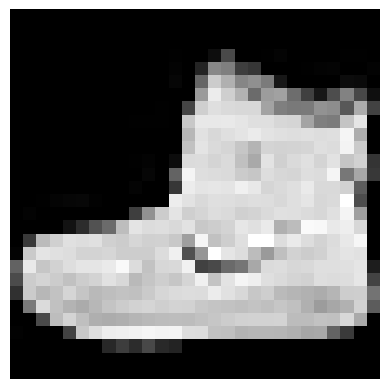

In [72]:
a, b = test_dataset.__getitem__(0)
print(b)

plt.imshow(a)
plt.axis('off')  # Hide axis
plt.show()

a, b = train_dataset.__getitem__(0)
print(b)

plt.imshow(a)
plt.axis('off')  # Hide axis
plt.show()